# Curve fit SOC Datasheet

This is a small notebook to generate a curve fit for the Sanyo battery cell datasheet discharge curve.

In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

from soc import points_10A
points_10A = np.array(points_10A)

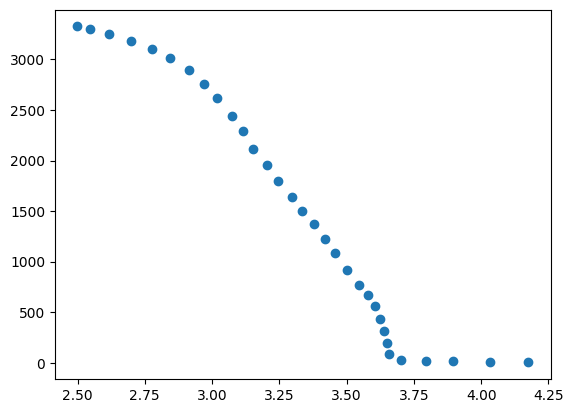

In [2]:
x_data = np.array(points_10A[:, 1])  # Cell Voltage (V)
y_data = np.array(points_10A[:, 0])  # Discharged Capacity (mAh)
plt.scatter(x_data, y_data);

Now, it comes time to guess at an equation that will fit the data. I'm gonna try a quintic polynomial.

Optimal Parameters: [-1.63894644e+03  3.21333294e+04 -2.42561855e+05  7.64036260e+05
  2.07192875e+05 -9.05753710e+06  2.82280097e+07 -3.82751345e+07
  2.01911532e+07]
Covariance Diagonal: [5.68962770e+05 2.40976337e+08 1.67676288e+10 3.26478374e+11
 3.50258317e+12 4.38514729e+13 2.59349342e+14 4.23680985e+14
 1.14526556e+14]


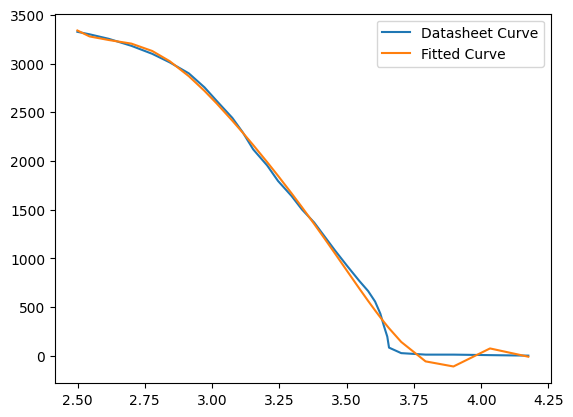

In [3]:
def f(x, *args):                                # This is our guess function form
    return np.polyval(args, x)
coefficients_f = [1, 1, 1, 1, 1, 1, 1, 1, 1]    # These are our guess parameters

opt, var = optimize.curve_fit(f, x_data, y_data, coefficients_f)
print(f"Optimal Parameters: {opt}")
print(f"Covariance Diagonal: {var.diagonal()}")

fig, ax = plt.subplots()
ax.plot(x_data, y_data, label="Datasheet Curve")
ax.plot(x_data, f(x_data, *opt), label="Fitted Curve")
plt.legend()
plt.show()

Well, that's not great; it definitely misses some features that we want (the fit isn't monotonically decreasing, for example, which we reaaally want without it we will have SoC seem to increase with discharge at high voltage).

Let's try again with something a lot messier.

Optimal Parameters: [ 3.80692776e+03  3.05358486e+00  5.65913073e+00  1.03077310e+03
 -2.06935980e+02 -8.76056553e-01  2.60572753e+00]
Covariance Diagonal: [1.02107815e+06 1.45628361e+00 1.72704419e+04 1.68873904e+11
 1.36640860e+17 5.10746501e+00 4.12960879e+12]


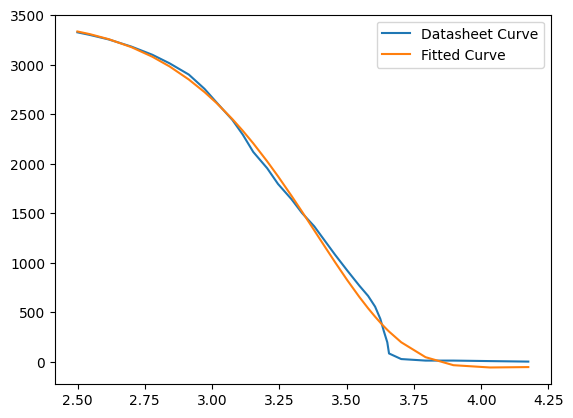

In [4]:
# def g(x, *args):
#     return np.exp(args[0] * x + args[1]) * np.polyval(args[2:], x) / np.power(np.polyval(args[6:], x), args[5])
# coefficients_g = [1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 10]

def g(x, *args):
    return args[0] / np.power(1 + np.exp(args[1] * (x - args[2])), args[3]) + args[4] * np.exp(args[5] * (x - args[6]))
coefficients_g = [4000, 1, 2, 1.5, -200, 5, 3.8]


with np.errstate(all='ignore'):
    opt, var = optimize.curve_fit(g, x_data, y_data, coefficients_g, maxfev=500000)

print(f"Optimal Parameters: {opt}")
print(f"Covariance Diagonal: {var.diagonal()}")

fig, ax = plt.subplots()
ax.plot(x_data, y_data, label="Datasheet Curve")
ax.plot(x_data, g(x_data, *opt), label="Fitted Curve")
plt.legend()
plt.show()

Woah. A lot better. Now let's do the 2A curve.

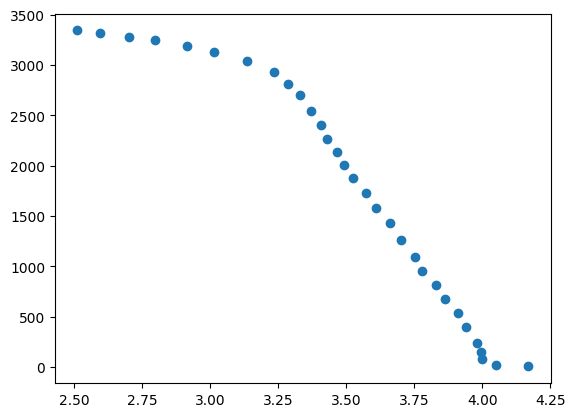

In [7]:
from soc import points_2A

points_2A = np.array(points_2A)
x_data = np.array(points_2A[:, 1])  # Cell Voltage (V)
y_data = np.array(points_2A[:, 0])  # Discharged Capacity (mAh)
plt.scatter(x_data, y_data)

Optimal Parameters: [-1.02680518e+01  2.43805760e+01 -2.78558014e+00  1.77778078e+01
 -2.70378393e+01  3.08895269e+00  2.80390256e-02 -3.75040186e-01
  1.56319745e+00 -1.98899865e-01 -1.49624032e+01  3.68516384e+01
 -2.62416076e+01]
Covariance Diagonal: [3.29205301e+03 1.66076265e+07 1.23584360e+08 4.83910205e+09
 9.85085912e+09 9.83697546e+02 5.10866983e-02 7.12210426e+00
 9.71449440e+01 7.39595869e+01 1.06493270e+04 1.77057531e+05
 3.05888723e+05]


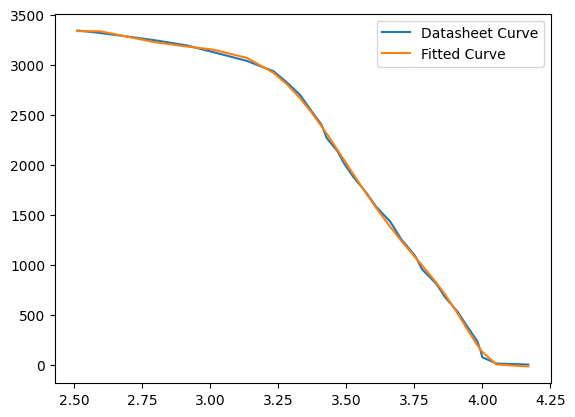

In [8]:
def g(x, *args):
    return np.exp(args[0] * x + args[1]) * np.polyval(args[2:], x) / np.power(np.polyval(args[6:], x), args[5])
coefficients_g = [1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 10]


# def g(x, *args):
#     return args[0] / np.power(1 + np.exp(args[1] * (x - args[2])), args[3]) + args[4] * np.exp(args[5] * (x - args[6]))
# coefficients_g = [4000, 1, 2, 1.5, -200, 5, 3.8]


with np.errstate(all='ignore'):
    opt, var = optimize.curve_fit(g, x_data, y_data, coefficients_g, maxfev=500000)

print(f"Optimal Parameters: {opt}")
print(f"Covariance Diagonal: {var.diagonal()}")

fig, ax = plt.subplots()
ax.plot(x_data, y_data, label="Datasheet Curve")
ax.plot(x_data, g(x_data, *opt), label="Fitted Curve")
plt.legend()
plt.show()